**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: Faris Abu Ali,   **Date**: 27.01.2025

<div class="alert alert-info">

# Assignment 5 - Graphs
</div>



### Outline and goals

In the fifth assignment, we will revise graph drawing and graph analysis using three types of graphs. You will learn about the [networkx library](https://networkx.github.io) and the [pygraphviz library](https://pygraphviz.github.io) for graph analysis and drawing. The goals of the assignment are:
- be able to decide on an appropriate layout for a given graph and discuss aesthetics criteria
- draw a graph in the notebook and manipulate the visualization
- analyze a given graph algorithmicly and visually

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

In [1]:
!pip install networkx -q

## My Steps to Install pygraphviz on Google Colab


1. **Install Required System Libraries:**
  - Run the following commands in a Colab cell to install Graphviz and its development libraries:

In [2]:
!apt-get install -y graphviz libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

2. **Install pygraphviz**
  - After installing the system libraries, install pygraphviz using pip:

In [3]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169677 sha256=c83d8518525b07f136b85af7f0937a97fb7753d3fc68c744f4b348dc38c30b89
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


3. **Test the Installation**
  - Verify the installation by running:

In [4]:
import pygraphviz
print("PyGraphviz installed successfully!")


PyGraphviz installed successfully!


In [5]:
import pandas as pd
import numpy as np

import networkx as nx # there have been problems with networkx and pygraphviz on windows in the past. If possible, try a different system.
import itertools
from bokeh.palettes import Category20

from IPython.display import Image

<div class="alert alert-info">

## Exercise 1 - Graph algorithms recap
</div>

In the first exercise, you will work on a synthetic graph to practice fundamental operations and revise the concepts from the lecture.


**1.1 Manual drawing**

G1 below is defined as a directed graph [nx.DiGraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html). Edges are given as ordered tuples `(start_node, end_node)`.  

<div class="alert alert-success">
    
- Draw the graph defined in G1 manually (no prove required). Do not follow the rules learned in class, but create a layout to your liking.
- Did you follow aesthetics criteria? If yes, which? Either case, which ones should be followed.
- Which type of graph is G1?
- Which types of layouts are applicable?
</div>


- Manual Drawing:

  <img src="https://drive.google.com/uc?id=1HlN4LWnlL3hdgVodqmzM60W8iLpcesDA" alt="Manual Drawing" width="500" height="500">

<br />

- **Aesthetics Criteria to be Followed:**
  - **Edges point in a uniform direction:**
    - This eases the analysis of cause and effect and the general flow of the graph.
    - Sadly, I didn't quite apply this. My drawing has some horizontal edges and some other vertical.

  - **Edges are as short as possible:**
    - This helps readability.
    - In my case, I had to draw some edges longer as others. e.g., `(1,8)`

  - **Edges are as straight as possible:**
    - This helps readability.
    - I could have done better.

  - **Nodes are uniformly distributed:**
    - This avoids clutter and edge crossings, and makes the graph harmonic.
    - In my case, I think I did a good job, but algorithms e.g., *Dot layout algorithm* could distribute the nodes even better.

  - **Minimized Edge Crossings:**
    - This makes edges easier to follow and graph structures easier to analyze.
    - Luckily, I didn't introduce any edge crossing.

<br/>

- **Graph Type:**
  - G1 is a Directed Cyclic graph.

<br />

- **Which types of layouts are applicable:**
  - **Dot layout algorithm:** Applying DOT layout (i.e., (Heuristics for the Sugiyama framework) will work on removing the cycle and thus, it can then be called a **Level Graph**.

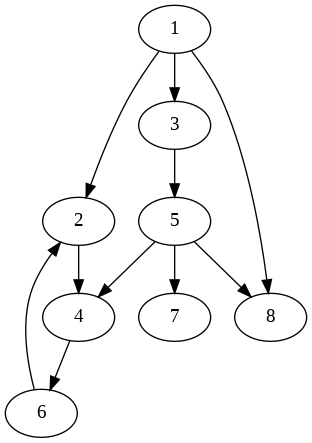

In [6]:
G1 = nx.DiGraph()
G1.add_edges_from([(1,2), (1,3), (2,4), (3,5), (5,4), (4,6), (6,2), (5,7), (5,8), (1,8)])
Image(nx.nx_agraph.to_agraph(G1).draw(format='png', prog='dot'))

# to_agraph() Returns a pygraphviz graph from a NetworkX graph N.

**1.2 Graph drawing**
    
The [pygraphviz library](https://pygraphviz.github.io) is used to obtain the layout. Pygraphviz is partly integrated into networkx and uses the [AGraph](http://pygraphviz.github.io/documentation/pygraphviz-1.5/reference/agraph.html) graph representation. The result image of the graph drawing routine can be exported or rendered in the notebook using the [`Image`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image) class to encapsulate it.

Using the graph drawing above, answer the following questions:

<div class="alert alert-success">
    
- Which layout algorithm is used to render G1?
- Does the graph G1 contain cycles? If yes, which?
- Why is node 2 rendered on level 3?
- Compute the forward, backward and cross edges of G1. Children are handeled in order of their id, smallest first. The method `classify_edges` below implements the edge classification for recap.
</div>

**Answers:**

<div class="alert alert-warning">

- Layout Algorithm:
  - the **DOT layout algorithm** from Graphviz is being used to render the graph.
  - the `prog='dot'` argument specifies the layout algorithm used to render the graph G1.

<br />

- Does it contain cycles?
  - Yes, it contains only one cycle (2 → 4 → 6 → 2)

<br />

- Why is node `2` rendered in level 3
  - According to the level graph definition, if there is a directed edge `(u, v)`, then `λ(v) = λ(u) + 1`.
  - There is a directed edge `(2, 4)`, so `λ(4) = λ(2) + 1`.
  - Given that `𝜆(4) = 4`, it follows that `λ(2) = 3`.

<br/>

- Edge classification:
  - (1, 8) forward edge
  - (6, 2) backward edge
  - (5, 4) cross edge
</div>

In [7]:
# dfs = nx.dfs_labeled_edges(G1)

# print(sorted(dfs))

In [8]:
def classify_edges(G):
    '''Edge classification of a directed graph using depth first search.
    '''
    # nodes that have been visited in the traversal
    marked = dict([(n,0) for n in sorted(G.nodes)])

    # do depth-first-traversal and classify edges
    # traverse edges with (start, end, edge type d)
    for s,e,d in nx.dfs_labeled_edges(G):
        if (s==e):
            continue # ignore edges like (1,1) or (2,2) ...

        # mark start-node as visited
        marked[s] = 1

        # skip return-to-child-node step in DFS
        if  (d == 'reverse'):
            continue

        # if end-node has not been visited yet, it's a tree edge
        if marked[e] == 0:
            print(s,e,'tree edge')
            marked[e] = 1
        # end-node has been visited before
        else:
            # create graph without current edge
            G_ = G.copy()
            G_.remove_edge(s,e)
            if e in nx.descendants(G_, s):
                print(s,e,'forward edge')
            elif e in nx.ancestors(G_, s):
                print(s,e,'backward edge')
            else:
                print(s,e,'cross edge')

classify_edges(G1)

1 2 tree edge
2 4 tree edge
4 6 tree edge
6 2 backward edge
1 3 tree edge
3 5 tree edge
5 4 cross edge
5 7 tree edge
5 8 tree edge
1 8 forward edge


### Summary to clarify the differences between different edge types in the context of depth-first search (DFS) traversal:

---

### **1. Types of Edges in DFS Traversal**
During DFS, edges in a directed graph are classified into four categories based on their relationship to the DFS tree:

1. **Tree Edge (Spanning Tree Edge)**:
   - These are edges that are **discovered for the first time** during the DFS traversal.
   - They directly connect a node to a previously unvisited (child) node in the DFS tree.

2. **Forward Edge**:
   - These are edges that connect a node **to one of its descendants** in the DFS tree, but they are **not tree edges**.
   - This means the target node was already visited earlier in the traversal but is still in the recursion stack.

3. **Back Edge**:
   - These edges point **backward to an ancestor** of the current node in the DFS tree.
   - They form cycles in directed graphs.

4. **Cross Edge**:
   - These edges point to a node that is **neither an ancestor nor a descendant** (a node in a different DFS tree or an already finished node).

---

### **2. Why Is `1 -> 8` a Forward Edge?**
In the graph:
- Node `8` is **a descendant** of `1` in the DFS tree (because it is reachable via other tree edges, e.g., `1 -> 3 -> 5 -> 8`).
- The edge `1 -> 8` does not introduce a new child relationship (it's not a tree edge). Instead, it points to a node already visited earlier in the DFS traversal but still within the same DFS tree.
- Therefore, it's classified as a **forward edge**.

---

### **3. Why Is `2 -> 4` a Tree Edge?**
In the graph:
- When the DFS reaches node `2`, node `4` has not been visited yet.
- The edge `2 -> 4` introduces a **new child** relationship in the DFS tree (i.e., node `4` becomes a child of node `2`).
- Thus, it is classified as a **tree edge**.

---

### **Key Difference Between Forward and Tree Edges**
- A **tree edge** creates a new connection to an unvisited node, building the DFS tree.
- A **forward edge** points to an already visited node that is a descendant in the DFS tree but does not add a new relationship.

---

### **4. Why Is `6 -> 2` a Back Edge?**
- The edge `6 -> 2` points back to an **ancestor** (`2`) in the DFS tree. This means that node `2` was visited before node `6` in the current path, and it is still part of the recursion stack.
- Back edges form cycles or point to earlier nodes in the DFS hierarchy.

---

### **Summary**
- **Tree edge (`2 -> 4`)**: Introduces a new, unvisited node into the DFS tree.
- **Forward edge (`1 -> 8`)**: Points to an already visited descendant node.
- **Back edge (`6 -> 2`)**: Points backward to an ancestor in the DFS tree.

<div class="alert alert-info">

## Exercise 2 - Working with hierarchies
</div>

The file [`programmingLanguages.gml`](programmingLanguages.gml) contains information on the genealogy of some of the more influential or widely used programming languages as discussed by (Scott, 2000). Edges indicate principal influences on design. The resulting graph encodes the flow of ideas through the languages and their paradigms. Many influences, of course, cannot be shown in a single figure, but the chart can give a good initial sense of dependencies.

Note that the graph also contains a date for each language which indicates the approximate time at which its features became widely known. This information can be used for rendering but is not incorporated in the current layout.

In [10]:
from google.colab import drive
import os

if not os.path.isdir("/content/drive/MyDrive"):
    drive.mount('/content/drive', force_remount=True)

DRIVE_BASE_PATH = f"/content/drive/MyDrive/Colab Notebooks/Data_Visualization/Assignment_05"

Mounted at /content/drive


In [11]:
G2 = nx.read_gml(f"{DRIVE_BASE_PATH}/programmingLanguages.gml")

print("nodes in the graph", G2.nodes(data=True))
print()

language = 'Simula'
print(language, "became widely known in", G2.nodes[language]['year'])

nodes in the graph [('Fortran I', {'year': 1957}), ('Fortran II', {'year': 1958}), ('Fortran IV', {'year': 1965}), ('Fortran 77', {'year': 1978}), ('Fortran 90', {'year': 1991}), ('Algol 58', {'year': 1958}), ('Basic', {'year': 1964}), ('Visual Basic', {'year': 1991}), ('Fortran 95', {'year': 1997}), ('Algol 60', {'year': 1960}), ('Algol W', {'year': 1966}), ('Pascal', {'year': 1971}), ('Modula-2', {'year': 1978}), ('Oberon', {'year': 1988}), ('Modula-3', {'year': 1991}), ('Algol 68', {'year': 1968}), ('BCPL', {'year': 1966}), ('C', {'year': 1972}), ('Simula', {'year': 1965}), ('Simula 67', {'year': 1967}), ('Ada', {'year': 1980}), ('Ada 95', {'year': 1995}), ('C++', {'year': 1983}), ('Smalltalk 80', {'year': 1980}), ('Eiffel', {'year': 1986}), ('Java', {'year': 1995}), ('Lisp', {'year': 1959}), ('Scheme', {'year': 1975}), ('Common Lisp', {'year': 1984}), ('CLOS', {'year': 1988}), ('ML', {'year': 1973}), ('Miranda', {'year': 1986}), ('Haskell', {'year': 1990})]

Simula became widely kn

The chart below displays the programming languages graph. Answer the following questions and give a graphical answer by coloring respective nodes.
    
<div class="alert alert-success">   
    
- **Initial languages**: Which languages were not influenced by others?
- **Long history**: Which language has the longest history, i.e., the longest path to a source node?
    - What is the path length?
    - Is the answer unique?
- **Not influenced by Fortran I**: List all languages that were not influenced by Fortran I (directly or indirectly).
</div>

**Example below**: All languages that influenced Java directly or indirectly.
    
**Hints**:
- Networkx provides [methods for directed graphs](https://networkx.github.io/documentation/stable/reference/classes/digraph.html) (see Method section at bottom of page) and
- additional [algorithms for directed acyclic graphs](https://networkx.github.io/documentation/stable/reference/algorithms/dag.html).
- Each question can be answered with one line of code.

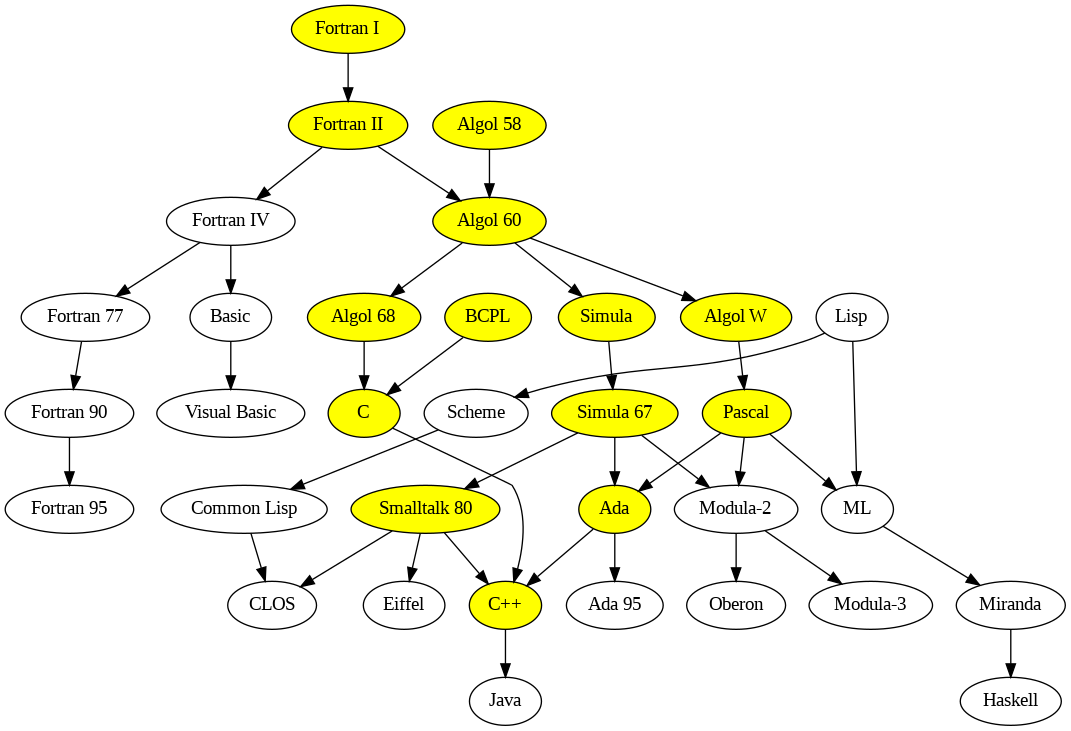

In [12]:
A2 = nx.nx_agraph.to_agraph(G2) # `to_graph` Returns a pygraphviz graph from a NetworkX graph N.
A2.node_attr['style']='filled'

# shortcut the dag package path:
dag = nx.algorithms.dag

# Return all nodes having a path to 'Java' in G2.
influences = dag.ancestors(G2,source='Java')

for n_id in G2:
    n = A2.get_node(n_id)
    if n_id in influences:
        n.attr['fillcolor']='yellow'
    else:
        n.attr['fillcolor']='white'


Image(A2.draw(format='png', prog='dot'))

-------------------------
**Answers**:

- Initial languages: Let's mark languages that were not influenced by others

INITIAL LANGUAGES (i.e., Not Influenced by Others):
- Fortran I
- Algol 58
- BCPL
- Lisp


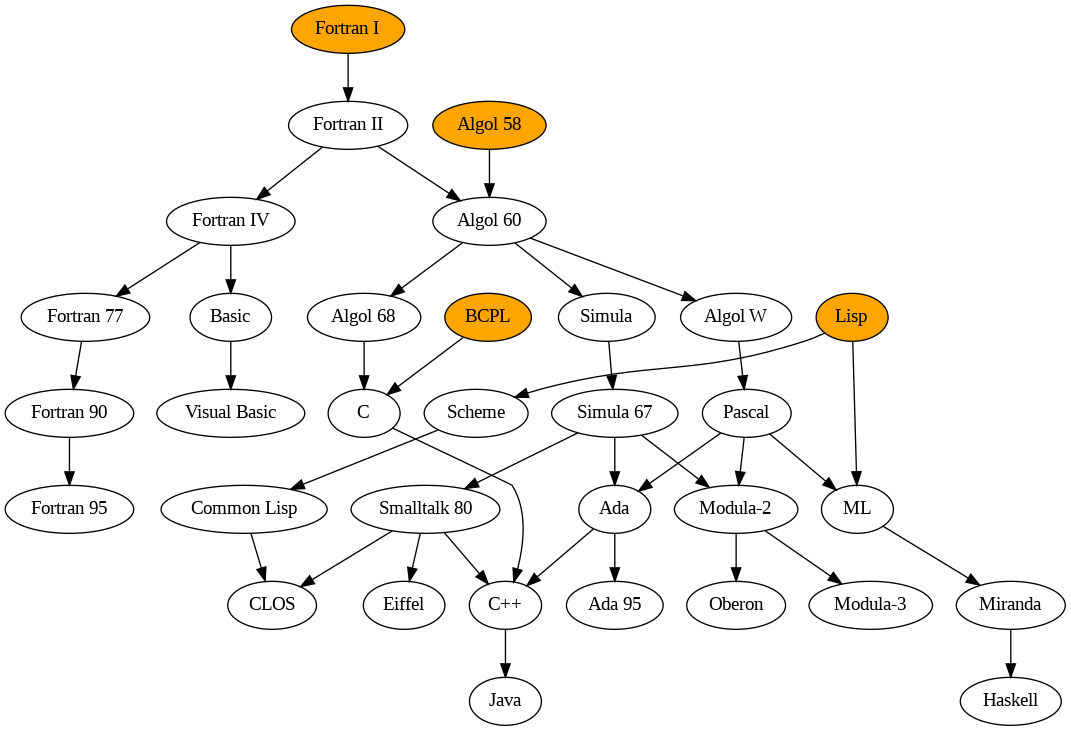

In [13]:
A2 = nx.nx_agraph.to_agraph(G2) # `to_graph` Returns a pygraphviz graph from a NetworkX graph N.
A2.node_attr['style']='filled'

# shortcut the dag package path:
dag = nx.algorithms.dag

print('INITIAL LANGUAGES (i.e., Not Influenced by Others):')

for n_id in G2:
    # Find languages that were not influenced by others:
    node_ancestors: set[str] = dag.ancestors(G2, source=n_id)

    n = A2.get_node(n_id)

    if len(node_ancestors) == 0:
      n.attr['fillcolor']='orange'
      print(f'- {n_id}')
    else:
      n.attr['fillcolor']='white'

Image(A2.draw(format='png', prog='dot'))

-------------------
- **Long history**: Which language has the longest history, i.e., the longest path to a source node?
  - Answer: Both Haskell & Java have the longest history (ascendants)
    - What is the path length?
      - Answer: 7
    - Is the answer unique?
      - No, in `NetworkX`, the function `dag_longest_path` returns one of the longest paths in a Directed Acyclic Graph (DAG).
      - However, if multiple longest paths exist, it won't automatically detect or return all of them. It simply computes one based on its traversal order.

longest_path=['Fortran I', 'Fortran II', 'Algol 60', 'Algol W', 'Pascal', 'ML', 'Miranda', 'Haskell']
dag_longest_path_length=7


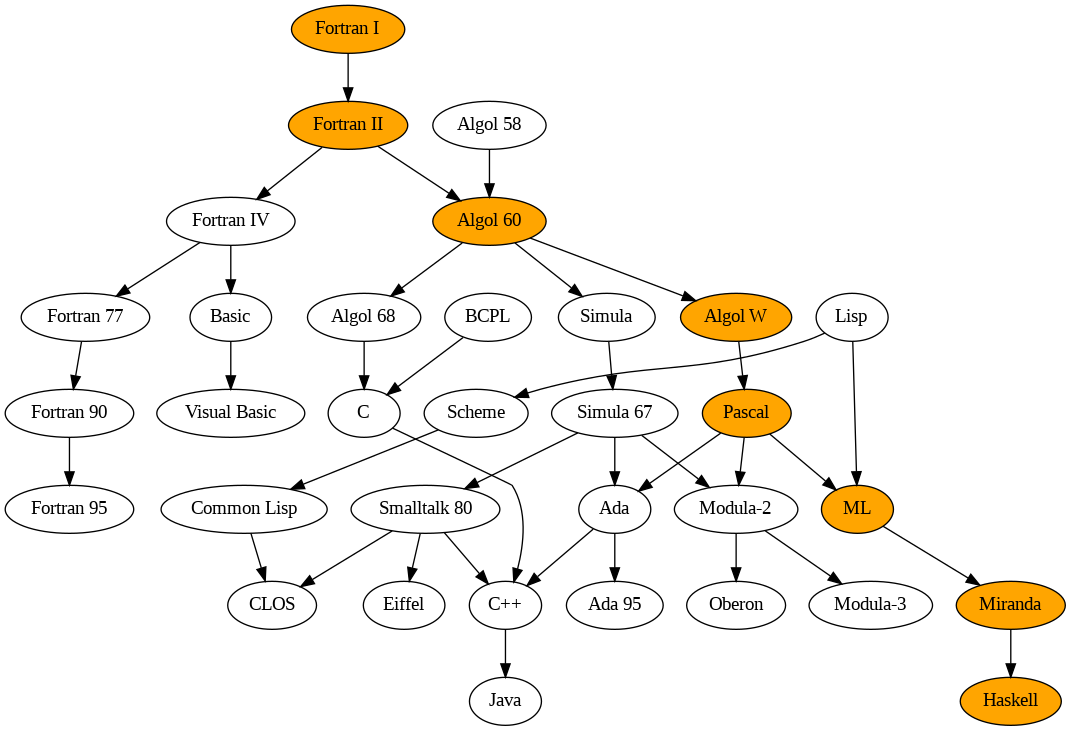

In [14]:
A2 = nx.nx_agraph.to_agraph(G2) # `to_graph` Returns a pygraphviz graph from a NetworkX graph N.
A2.node_attr['style']='filled'

# shortcut the dag package path:
dag = nx.algorithms.dag

longest_path: list[str] = dag.dag_longest_path(G2)
dag_longest_path_length = dag.dag_longest_path_length(G2)

for n_id in G2:
    n = A2.get_node(n_id)

    if n_id in longest_path:
      n.attr['fillcolor']='orange'
    else:
      n.attr['fillcolor']='white'


print(f'{longest_path=}')
print(f'{dag_longest_path_length=}')

Image(A2.draw(format='png', prog='dot'))

-----------------------------
- **Not influenced by Fortran I**: List all languages that were not influenced by Fortran I (directly or indirectly).

Languages Not Influenced by Fortran I:
- Algol 58
- BCPL
- Lisp
- Scheme
- Common Lisp


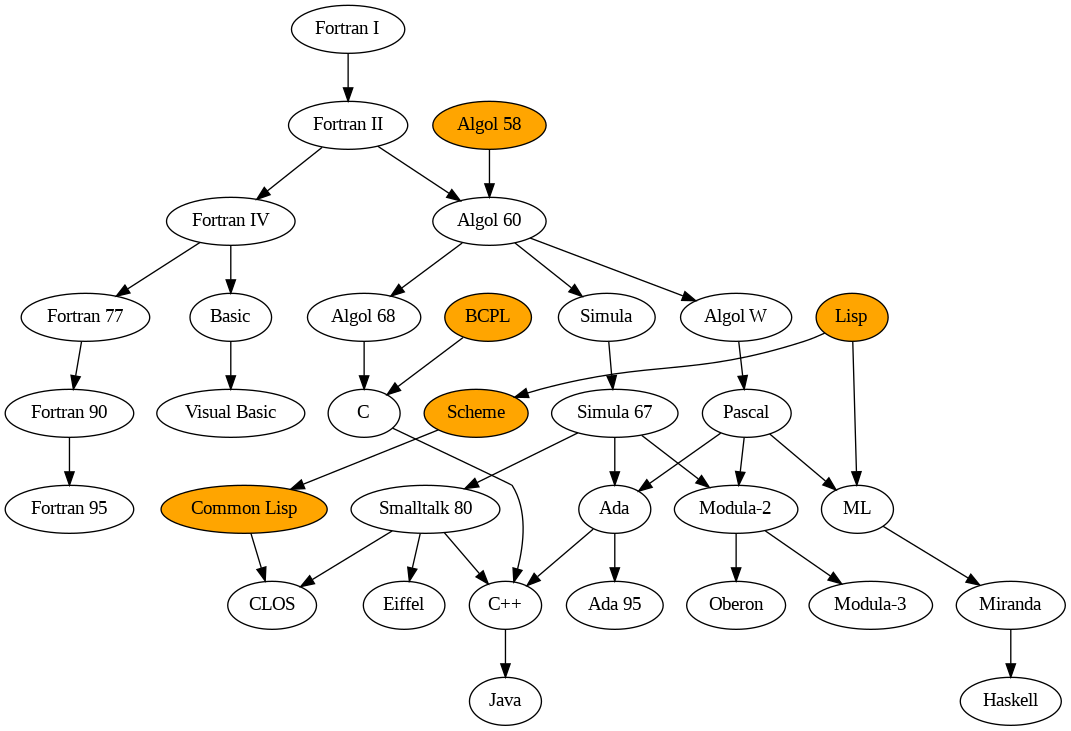

In [15]:
A2 = nx.nx_agraph.to_agraph(G2) # `to_graph` Returns a pygraphviz graph from a NetworkX graph N.
A2.node_attr['style']='filled'

# shortcut the dag package path:
dag = nx.algorithms.dag

print('Languages Not Influenced by Fortran I:')

for n_id in G2:
    # Find languages that were not influenced by others:
    node_ancestors: set[str] = dag.ancestors(G2, source=n_id)

    n = A2.get_node(n_id)

    if 'Fortran I' not in node_ancestors and n_id != 'Fortran I':
      n.attr['fillcolor']='orange'
      print(f'- {n_id}')
    else:
      n.attr['fillcolor']='white'

Image(A2.draw(format='png', prog='dot'))

<div class="alert alert-info">

## Exercise 3 - Analyzing social networks
</div>

In the last exercise, you will analyze social networks. Choose ***ONE*** of two datasets each representing a co-appearance network:
- characters in the novel Les Miserables by Victor Hugo and how often they are together on stage (edges)
- characters in fan fiction in the Harry Potter universe and a count on how often they occur together in fan fictions (edges)

A critical element in the analysis are **communities**. **A community in a graph is a set of nodes that is densely connected**, i.e., many of the nodes in a community feature pairwise edges.

The graphs below represent the respective co-occurences. Both graphs are drawn using the [`neato`](https://www.graphviz.org/pdf/neatoguide.pdf) algorithm of `pygraphviz` which uses a `force-directed` layout. Communitites are detected using the
[Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html) from networkx. Each community is colored in a unique color in the graph.
    
For your chosen social network, answer the following questions:
<div class="alert alert-success">
    
- What are aesthetics criteria aimed for by `force-directed` layout?
- How good are these criteria met in the graph visualization? Rate each criterion using good, medium, poor and find an area in the graph to support your rating.
- Below you can find a list of social groups present in the novel. Check if they are detected by the automatic community detection. When do the communities based on human knowledge and graph analysis match and when not?
- Can you detect characters that should belong to multiple communities?
    - by exploring the graph structure and maybe from your background knowledge
    - Advanced question: How could you visualize the affiliation with two or more communities?
</div>

### Les Miserables

The dataset [`lesmiserables.gml`](lesmiserables.gml) contains a coappearance network of characters in the novel [Les Miserables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables) by Victor Hugo. The [graph](lesmiserables_graph.png) is rendered using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data courtesy: D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*

In [17]:
G3 = nx.read_gml(f"{DRIVE_BASE_PATH}/lesmiserables.gml")
A3 = nx.nx_agraph.to_agraph(G3) # to_agraph: Converts Networkx graph to pygraphviz
A3.node_attr['style']='filled'

for e in A3.edges_iter():
    '''Scale the line_width of the edges by the edge weight
    '''
    e.attr['penwidth'] = int(int(e.attr['value'])/5)*2+1


community = nx.algorithms.community

def color_communities(G,A,k=9):
    # Communitites are detected using the Girvan-Newman community detection algorithm from networkx.
    # Each community is colored in a unique color in the graph.
    comp = community.centrality.girvan_newman(G) # Finds communities in a graph using the Girvan–Newman method.
    # Returns Iterator over tuples of sets of nodes in G.
    # - Each set of node is a community,
    # - each tuple is a sequence of communities at a particular level of the algorithm.

    comm = next(itertools.islice(comp, k, None))
    partition_quality = community.partition_quality(G,comm)[1]
    num_communities = len(comm)
    print(f'quality {partition_quality:.3f} with {num_communities} communities.')

    def color_nodes(A, communities):
        '''Color the nodes of an AGraph based on a given community structure
        '''
        for ids,color in zip(list(sorted(c) for c in communities), Category20[20]):
            for i in ids:
                n = A.get_node(i)
                n.attr['fillcolor']=color

    color_nodes(A, comm)

color_communities(G3, A3, 9)
# the choice of k=9 in the Girvan-Newman algorithm corresponds to a desire to split the graph into exactly 9 communities.

quality 0.918 with 11 communities.


A [list of characters](https://en.wikipedia.org/wiki/List_of_Les_Misérables_characters) can be found on wikipedia.

Communitites in Les Miserables in order of appearance:
- **Main characters**: Valjean, Cosette, Marius
- **People in church**: Myriel, MlleBaptistine, MmeMagloire
- **Grisettes (working women)**: Fantine, Zephine, Dahlia, Favourite
- **Wealthy students**: Blacheville, Tholomyes, Listolier, Fameuil
- **Bandits + (family)**: MmeThenardier, Thenardier, (Cosette), (Gavroche), Eponine, Anzelma, Montparnasse, Claquesous, Babet, Gueulemer, Brujon
- **Police and court**: Javert, Bamatabois, Champmathieu
- **Rich monarchists**: Gillenormand, MlleGillenormand, MmePontmercy, LtGillenormand
- **Revolutionary student club**: Marius, Enjolras, Combeferre, Prouvaire, Feuilly, Courfeyrac, Bahorel, Bossuet, Joly, Grantaire
- **Brothers**: Gavroche, Child1, Child2

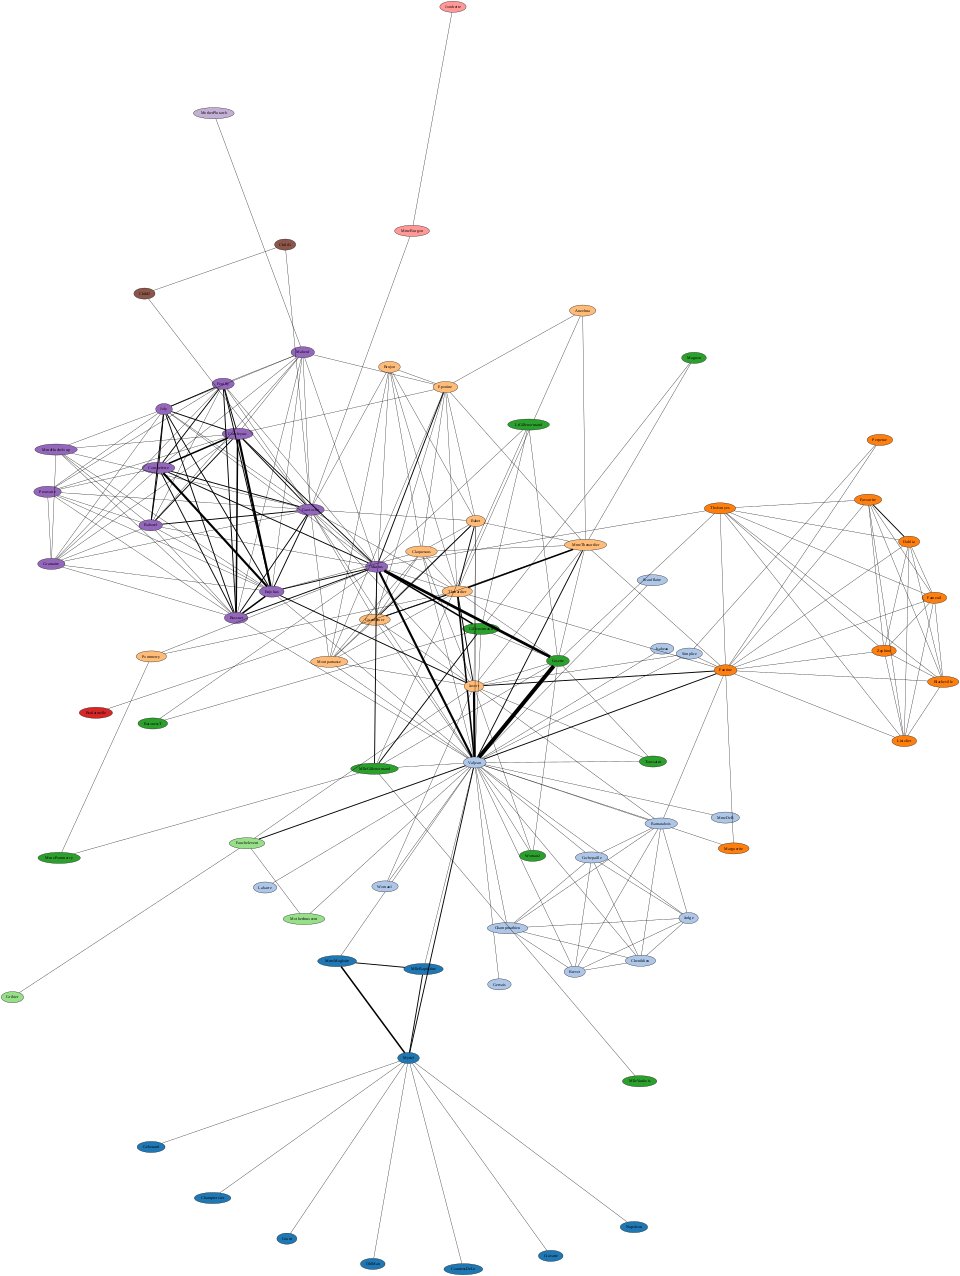

In [18]:
# Show image in notebook
Image(A3.draw(format='png', prog='neato', args="-Goverlap=scale -Gsize=10,15 -Gepsilon=.001 -Gmaxiter=50"))

# Export image
# A3.draw('lesmiserables_graph.png', format='png', prog='neato', args="-Goverlap=scale -Gsize=50,50 -Gepsilon=.001 -Gmaxiter=50")

# You can control the size of the image with the graph parameter -Gsize

**Answers:**

- **Aesthetics criteria aimed for by force-directed layout:**
  - Minimize Edge Crossings
  - Minimize Edges Corssing Nodes
  - Compact layout
    - Eases the process of browsing the social network.
  - Symmetry: uniform distribution of children.
  - Short & uniform edge lengths.

<br />

- **Graph Rating:**
  - Minimize Edge Crossings:
    - 😐 Medium
  - Minimize Edges Corssing Nodes:
    - 😐 Medium: Some nodes in the center of the graph are a bit hard to read due to edges crossing over them.
  - Compact layout
    - ✅ Good: Since it is possible to display the graph in one image and I still can zoom in and read the nodes labels and see the edges, I would say it is good compact.
  - Symmetry: uniform distribution of children.
    - 😐 Medium:
      - The children on the side are more uniformly distributed.
      - But in the center, nodes start to clutter more.
  - Short & uniform edge lengths.
    - ✅ Good:
      - Overall, edges are short enough and uniform.

<br />

- When do the communities based on human knowledge and graph analysis match and when not?
  - **Main characters**: Valjean, Cosette, Marius
    - In the generated graph:
      - Valjean: light blue
      - Cosette: green
      - Marius: purple
    - It seems the algorithm considers each of them in a different community. Nevertheless, we can still notice how thick the connecting edges between these three main nodes {`Valjean`, `Cosette`, `Marius`} are.
    - I would say this is a good sign, it shows that the algorithm recognized that these 3 are main characters.
    ![Miserables Main Characters](https://drive.google.com/uc?id=1uUKR6NobI2HBYT9C2qBSos2vMgz9WJz2)


  - **People in church**: Myriel, MlleBaptistine, MmeMagloire
    - ✅ The algo. classified them in one community (dark blue).
    - I can see in the graph they form a triangle with strong edges demonstrating the strong communication among them.

  - **Grisettes (working women)**: Fantine, Zephine, Dahlia, Favourite
    - ✅ The algo. classified them all in one community (dark orange)
    - The edges among them are not thick this time, maybe this can be interpreted by saying that: Yes, they are in the same community, but they didn't have strong communication in the novel script?

  - **Wealthy students**: Blacheville, Tholomyes, Listolier, Fameuil
    - ✅ The algo. classified them all in one community (dark orange)

<br />

- Can you detect characters that should belong to multiple communities?
  - We can detect **Bridge Nodes** (High Betweenness Centrality)
    - Characters with high betweenness centrality often act as bridges 🌉 between communities, suggesting they might belong to multiple groups.

      - Why: Betweenness centrality measures how often a node lies on the shortest paths between other nodes. A high score suggests the node connects disparate parts of the graph.
      How to Compute:

    - I tried the code below 👇 and got this result:
      - Potential bridge nodes: ['Myriel', 'Valjean', 'Fantine', 'Gavroche', 'Marius']


In [19]:
import networkx as nx

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G3)

# Identify nodes with high betweenness
threshold = 0.1  # Choose a threshold based on graph size
bridge_nodes = [node for node, centrality in betweenness.items() if centrality > threshold]
print("Potential bridge nodes:", bridge_nodes)


Potential bridge nodes: ['Myriel', 'Valjean', 'Fantine', 'Gavroche', 'Marius']


### Side notes for me to understand the **Betweenness Centrality** term
-  to understand the `k` parameter that we pass to `comm = next(itertools.islice(comp, k, None))`

- `itertools.islice`:
  - `itertools.islice(iterable, start, stop, step)` creates an iterator that slices the given iterable.

  - It behaves like slicing a list, but it works on iterators and avoids creating intermediate lists in memory.

  - If `stop` is `None`, it continues to the end of the iterator.

- `comp`:

  - This is the iterator returned by `nx.algorithms.community.centrality.girvan_newman(G)`.
  
  - Each element of comp is a tuple of sets, representing the communities at a particular level of the Girvan-Newman algorithm.

- `k`:
  The argument `k` specifies which level of the Girvan-Newman hierarchy to extract.
  For example, `k=11` extracts the community structure after 11 edges have been removed.

- `None`:
  By passing None as the stop argument, `itertools.islice` will continue until the end of the iterator (if needed, though it’s usually terminated early in this case).

------

- **Step-by-Step Example**
  - Imagine a small graph:
```
A -- B -- C -- D -- E
|    |         |
F    G         H
```
  - Initially, all nodes are in one group.

  - **Step 1:** Compute the betweenness centrality of all edges. The edge between `C` and `D` might have the highest betweenness because it's a "bridge" between two clusters.

  - **Step 2:** Remove the edge `C--D`. Now, the graph splits into:
  Group 1: `{A, B, C, F, G}`
  Group 2: `{D, E, H}`
  - Result: We now have 2 communities (`k=2`).

  If you wanted 3 communities (`k=3`), the algorithm would continue removing the next most central edge.

### Harrry Potter fan fiction

The Harry Potter fan fiction dataset contains a co-appearance network of characters in the Harry Potter fan fiction universe. The [graph is rendered](harrypotter_graph.png) using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data source: https://gist.github.com/allisonking/c9f6ea277e4194cf7e13f49efb83b5b5*

**Preprocessing**:

Load the Harry Potter fan fiction co-occurence data and turn this into a list of co-occurences.

In [21]:
harry_potter = pd.read_csv(f'{DRIVE_BASE_PATH}/HarryPotter_cooccurrence.txt')

# get the upper triangular matrix and turn into a list:

shape = harry_potter.shape # (50, 50)
# Return a copy of an array with the elements below the k-th diagonal zeroed.
triu = np.triu(np.ones(shape), k=1)
harry_potter = harry_potter.where(triu.astype(bool)).stack().reset_index()

print(harry_potter.head())

    level_0       level_1     0
0  Albus D.   Albus S. P.  25.0
1  Albus D.  Andromeda T.   6.0
2  Albus D.   Angelina J.   1.0
3  Albus D.    Astoria G.   1.0
4  Albus D.  Bellatrix L.  51.0


In [22]:
# rename the columns
harry_potter.columns = ['A','B','cnt']

# filter character pairs that co-occur at least 300 times
harry_potter = harry_potter[harry_potter.cnt >= 300].reset_index(drop=True)

harry_potter.head()

,A,B,cnt
0,Albus D.,Harry P.,2239.0
1,Albus D.,Hermione G.,357.0
2,Albus D.,Minerva M.,2941.0
3,Albus D.,OC,371.0
4,Albus D.,Severus S.,1948.0


Create a graph from the input data.

In [23]:
G4 = nx.Graph()

r = harry_potter.apply(lambda x: G4.add_edge(x.A, x.B, weight=x.cnt), axis=1)

# remove the meta group of original characters (OC)
G4.remove_node('OC')

A4 = nx.nx_agraph.to_agraph(G4) # convert the Networkx nx graph to pygraphviz
A4.node_attr['style']='filled'

for e in A4.edges_iter():
    '''Scale the line_width of the edges by the edge weight
    '''
    e.attr['penwidth'] = min(10000, float(e.attr['weight'])) / 1000 + 1

def color_communities(G,A,k=11):
    comp = nx.algorithms.community.centrality.girvan_newman(G) # Finds communities in a graph using the Girvan–Newman method.
    # Returns Iterator over tuples of sets of nodes in G.
    # - Each set of node is a community,
    # - each tuple is a sequence of communities at a particular level of the algorithm.
    comm = next(itertools.islice(comp, k, None))
    partition_quality = community.partition_quality(G,comm)[1]
    num_communities = len(comm)
    print(f'quality {partition_quality:.3f} with {num_communities} communities.')

    def color_nodes(A, communities):
        '''Color the nodes of an AGraph based on a given community structure
        '''
        for ids,c in zip(list(sorted(c) for c in communities), Category20[20]):
            for i in ids:
                n = A.get_node(i)
                n.attr['fillcolor']=c

    color_nodes(A, comm)

color_communities(G4, A4, 11)
# the choice of k=11 in the Girvan-Newman algorithm corresponds to a desire to split the graph into exactly 11 communities.

quality 0.871 with 14 communities.


Communitites in the Harry Potter universe:
- **Students**: Harry P., Ron W., Hermione G., Ginny W., Draco M., Neville L., Luna L., Pansy P., Blaise Z., Cedric D., Cho C.
- **Senior students**: Katie B., Oliver W., Percy W., George W., Fred W.
- **Teachers**: Albus D., Severus S., Minerva M.
- **Death Eaters**: Voldemort, Tom R. Jr., Lucius M., Narcissa M., Bellatrix L.
- **Marauders**: Marauders, James P., Sirius B., Remus L., Peter P.
- **Next generation kids**: Lily Luna P., James S. P., Albus S. P., Rose L., Teddy L., Scorpius M., Victoire W.

Additional communities
- the various families: Potter, Weasly, Malfoy, Black, Tonks, Lestrange, ...
- Order of the Phoenix
- school houses and school teams

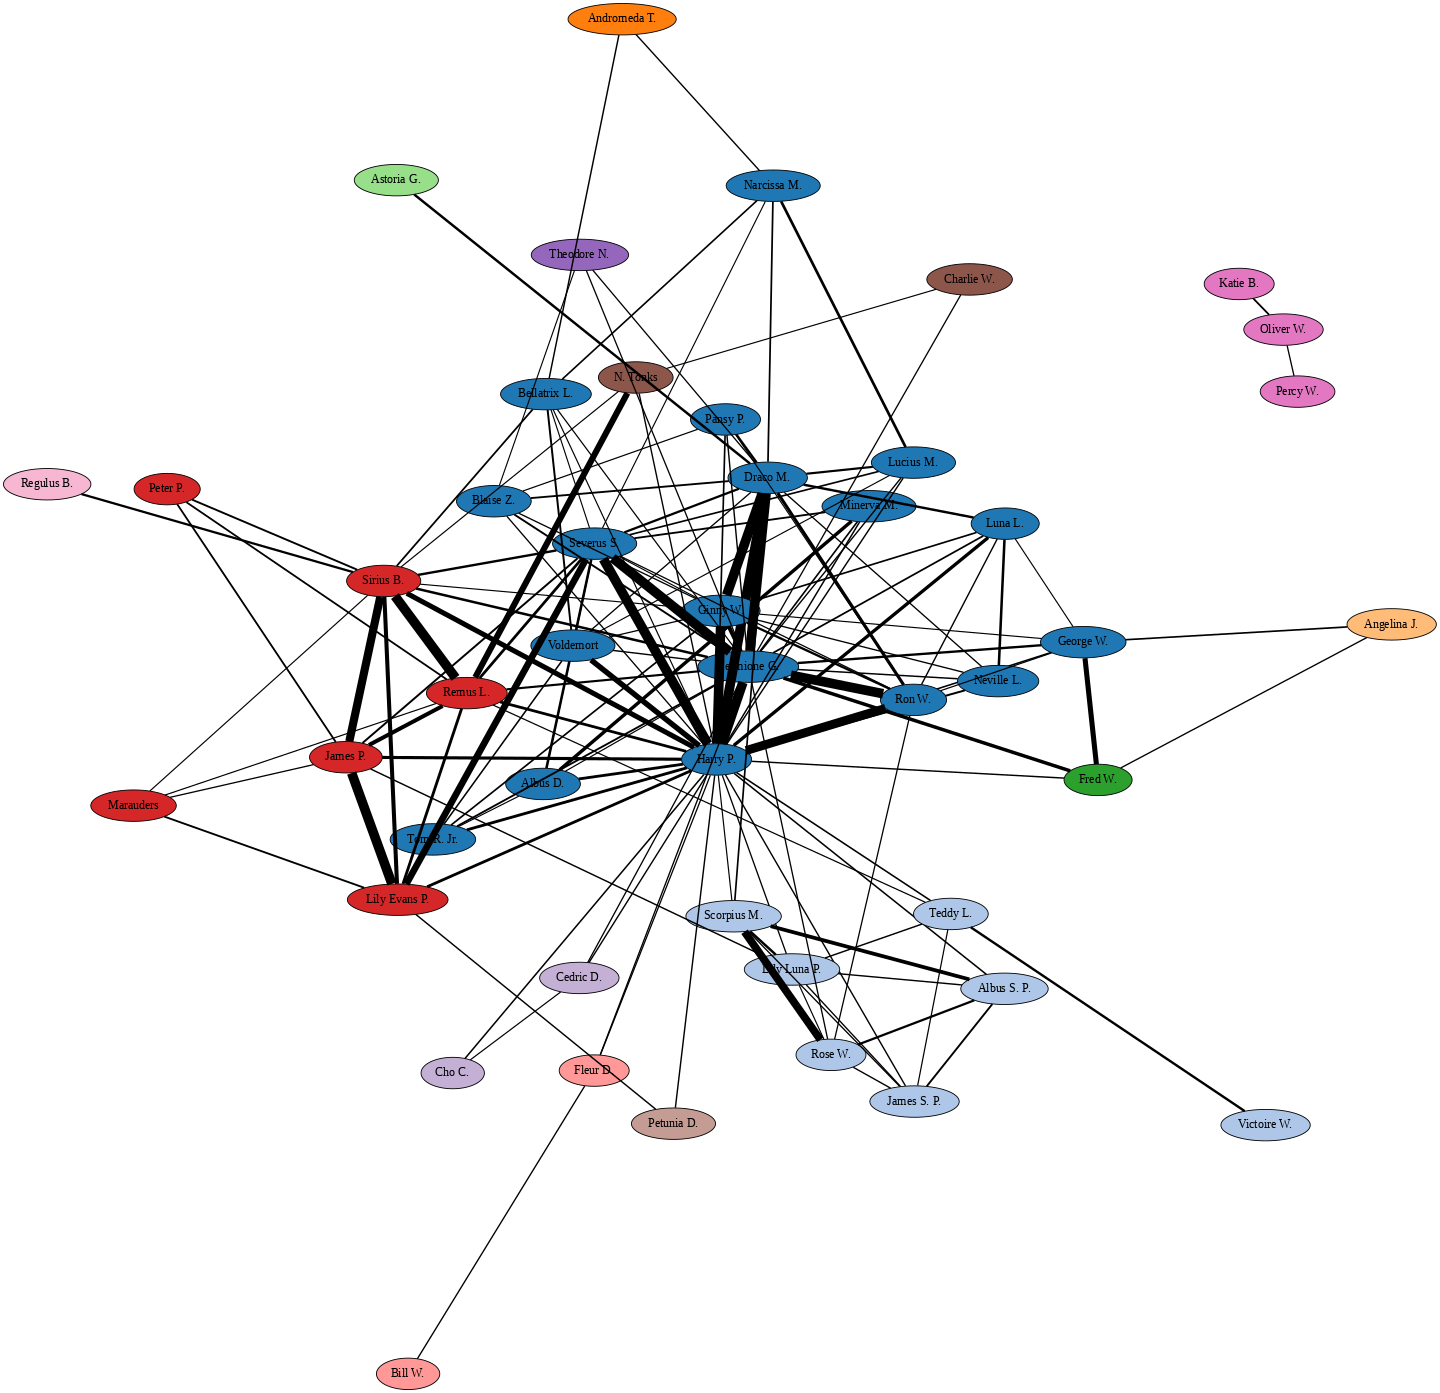

In [24]:
# Show image in notebook
Image(A4.draw(format='png', prog='neato', args="-Goverlap=scale -Gsize=15,15 -Gepsilon=.001 -Gmaxiter=50"))

# Export image
# A4.draw('harrypotter_graph.png', format='png', prog='neato', args="-Goverlap=scale -Gsize=50,50 -Gepsilon=.001 -Gmaxiter=50")

# You can control the size of the image with the graph parameter -Gsize

<div class="alert alert-warning">

I chose to answer the first dataset: Les Miserables.
</div>

### Estimate good number of communities in graph

First do the community detection for the parameters (0,k):

In [25]:
k=30
G = G4

comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
ks = [] # specified number of communities to split the graph into
qs = [] # quality for each specified number of communites
for i,communities in enumerate(limited):
    ks.append(i)
    qs.append(nx.algorithms.community.partition_quality(G,communities)[1])

<div class="alert alert-success">
    
Plot these values and look for the "knee" or "elbow" in the function, i.e., the value where the curve "bends" and additional communities have little quality increase.
    
</div>

In [26]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(width=400, height=400, title="Quality of GN-Community Measure in Harry Potter")

# add a line renderer
p.line(ks, qs, line_width=2)
p.xaxis.axis_label = 'Girvan Newman splitting parameter'
p.yaxis.axis_label = 'quality'

show(p)

In [27]:
k=30
G = G3 # Les Miserables Graph

comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
ks = [] # specified number of communities to split the graph into
qs = [] # quality for each specified number of communites
for i,communities in enumerate(limited):
    ks.append(i)
    qs.append(nx.algorithms.community.partition_quality(G,communities)[1])

In [28]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(width=400, height=400, title="Quality of GN-Community Measure in Les Miserables")

# add a line renderer
p.line(ks, qs, line_width=2)
p.xaxis.axis_label = 'Girvan Newman splitting parameter'
p.yaxis.axis_label = 'quality'

show(p)

<div class="alert alert-warning">
    
For **Les Miserables** good values are **4** and for **Harry Potter** is **7**
</div>